In [6]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

iterations = 10
n_array = np.array([25*i for i in range(1, 11)] + [50*i for i in range(6, 11)] + [100*i for i in range(6, 11)] + [200*i for i in range(6, 11)], dtype=np.int64)
# n_array = np.array([25*i for i in range(1, 11)], dtype=np.int64)

rt_dict = {}
meanRunTimeArray = []


In [7]:

# Compile the C++ program first (adjust the command if needed for your compiler)
subprocess.run(["g++", "-o", "project_integrated.exe", "project1_integrated.cpp"])

for n in n_array:
    # Run the C++ program with the current 'n' and capture the output
    result = subprocess.run(["project_integrated.exe", str(n), str(iterations)], capture_output=True, text=True, shell=True)
    output = result.stdout
    error = result.stderr

    if error:
        print(f"Error for n={n}: {error}")
        continue

    print(f"Output for n={n}: '{output}'\n")  # Print output for debugging

    runtimes = [float(line) for line in output.strip().split('\n') if line]
    rt_dict[n] = runtimes

    # Calculate the average runtime for each 'n'
    meanRunTime = np.mean(rt_dict[n])
    meanRunTimeArray.append(meanRunTime)
    print(f"Average time for n={n}: '{meanRunTime}\n")
    
    if not rt_dict:
        print("No runtime data collected. Exiting.")
        exit()

    # Ensure avg_rt_array is not empty before proceeding
    if not meanRunTimeArray:
        print("No average runtime data collected. Exiting.")
        exit()

Output for n=25: '5.10216e-05
5.60284e-05
4.72069e-05
4.69685e-05
4.72069e-05
4.60148e-05
4.72069e-05
4.69685e-05
4.72069e-05
4.69685e-05
'

Average time for n=25: '4.827979e-05

Output for n=50: '0.000337839
0.000319958
0.000328064
0.000323057
0.000328064
0.000319004
0.000320911
0.000320911
0.000326872
0.000385046
'

Average time for n=50: '0.0003309726

Output for n=75: '0.00188208
0.00144792
0.00148296
0.00114989
0.0010941
0.00109315
0.00109792
0.00110698
0.00173092
0.00111103
'

Average time for n=75: '0.001319695

Output for n=100: '0.00502896
0.00391603
0.005759
0.00419402
0.00292802
0.00561905
0.00488997
0.00473809
0.00453711
0.00567293
'

Average time for n=100: '0.0047283180000000005

Output for n=125: '0.00866008
0.00924397
0.00539279
0.00550795
0.00629187
0.00528789
0.00518799
0.00516415
0.00485802
0.00550818
'

Average time for n=125: '0.006110289

Output for n=150: '0.01337
0.011066
0.0123091
0.010915
0.00980902
0.0103719
0.00973988
0.00882602
0.010433
0.011651
'

Average 

Theoretical Peak Performance: 27.2 GFlop/s


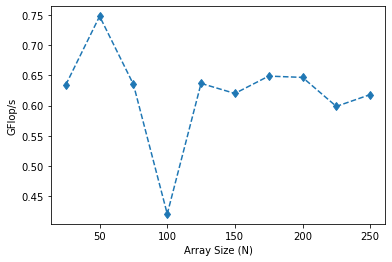

In [8]:
# Initialize an array to store the number of floating point operations.
flop_array = (n_array**2) * (2*n_array - 1)

# Calculate the performance in (Gflop/s)
performance = (flop_array / 1e9) / np.array(meanRunTimeArray)

ncores = 4  # number of cores
clkspeed = 3.4  # 3.4 GHz
fpus = 2  # FPUs/core

peakp = ncores * clkspeed * fpus

print("Theoretical Peak Performance:", peakp, "GFlop/s")

plt.figure()
plt.plot(n_array, performance, '--d')
plt.xlabel('Array Size (N)')
plt.ylabel('GFlop/s')
# plt.axhline(y=peakp, linestyle='--', color='red', label='Peak Performance')
plt.savefig('HPCCEmpiricalResults.png')
# plt.show()

In [16]:
for n, meanRunTime in zip(n_array, meanRunTimeArray):
    print(f"Mean Runtime for n = {n}: {np.round(meanRunTime,3)}")
print("\n")
for n, i in zip(n_array, performance):
    print(f"Mean Performance for n = {n}: {np.round(i,3)}")

    

Mean Runtime for n = 25: 0.0
Mean Runtime for n = 50: 0.0
Mean Runtime for n = 75: 0.001
Mean Runtime for n = 100: 0.005
Mean Runtime for n = 125: 0.006
Mean Runtime for n = 150: 0.011
Mean Runtime for n = 175: 0.016
Mean Runtime for n = 200: 0.025
Mean Runtime for n = 225: 0.038
Mean Runtime for n = 250: 0.05


Mean Performance for n = 25: 0.634
Mean Performance for n = 50: 0.748
Mean Performance for n = 75: 0.635
Mean Performance for n = 100: 0.421
Mean Performance for n = 125: 0.637
Mean Performance for n = 150: 0.62
Mean Performance for n = 175: 0.649
Mean Performance for n = 200: 0.647
Mean Performance for n = 225: 0.599
Mean Performance for n = 250: 0.618
